<a href="https://colab.research.google.com/github/codingneverends/qc_project/blob/master/QC_Grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 4.1 MB/s 
     |████████████████████████████████| 19.2 MB 2.3 MB/s 
     |████████████████████████████████| 240 kB 45.6 MB/s 
     |████████████████████████████████| 55 kB 728 kB/s 
     |████████████████████████████████| 106 kB 45.6 MB/s 
     |████████████████████████████████| 49 kB 2.9 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 53.4 MB/s 
     |████████████████████████████████| 50 kB 337 kB/s 
     |████████████████████████████████| 4.1 MB 40.4 MB/s 
     |████████████████████████████████| 1.9 MB 56.2 MB/s 
     |████████████████████████████████| 112 kB 61.5 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.2-py3-none-any.whl size=12224 sha256=638655f61f14e4a6bab5500937aaaae0589a7fcef8ce28cfb74e10be0b392a54
  Stored in directory: /root/.cache/pip/wheels/30/dc/90/0ee55

# Oracle

      Defining Oracle such a way that bit flip happens to 10 otherwise no bitflip

In [ ]:
oracle = QuantumCircuit(2,name='Oracle')
oracle.cz(1,0)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

# Diffusion

    H -- 2S><S-I -- H

In [ ]:
diffusion = QuantumCircuit(2,name="Grover's diffusion")
diffusion.h([0,1])
diffusion.z([0,1])
diffusion.cz(0,1)
diffusion.h([0,1])
diffusion.to_gate()
diffusion.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [ ]:
grover_iter = QuantumCircuit(2,name="Grover's Iter")
grover_iter.append(oracle,[0,1])
grover_iter.append(diffusion,[0,1])
grover_iter.draw()

┌─────────┐┌─────────────────────┐
q_0: ┤0        ├┤0                    ├
     │  Oracle ││  Grover's diffusion │
q_1: ┤1        ├┤1                    ├
     └─────────┘└─────────────────────┘

In [ ]:
backend=Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([1,0])
grover_circ.append(grover_iter,[0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw()

┌───┐┌────────────────┐┌─┐   
q_0: ┤ H ├┤0               ├┤M├───
     ├───┤│  Grover's Iter │└╥┘┌─┐
q_1: ┤ H ├┤1               ├─╫─┤M├
     └───┘└────────────────┘ ║ └╥┘
c_0: ════════════════════════╩══╬═
                                ║ 
c_1: ═══════════════════════════╩═

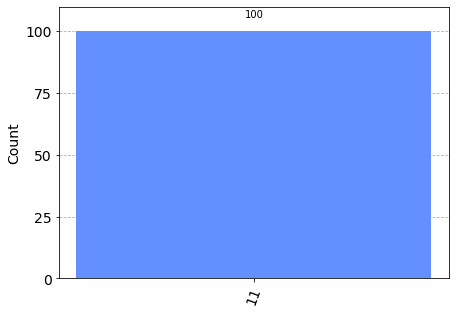

In [ ]:
job = execute(grover_circ,backend,shots=100)
result = job.result()
answer = result.get_counts()
plot_histogram(answer)

In [ ]:
# Load IBM Q account and get the least busy backend device
IBMQ.save_account("0a5ced1a3f664920244d5c38defa4b4ce07bde6a01f34170c9968ddbb102c062c705fa472a06e6380154fd771ebc91818529164f9899097d66dafb76518ae94e",overwrite=True)
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibm_oslo


In [ ]:
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circ, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


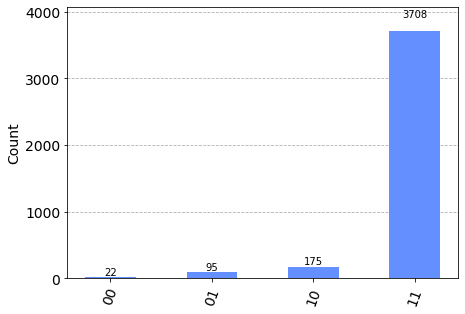

In [ ]:
results = job.result()
answer = results.get_counts(grover_circ)
plot_histogram(answer)